# Logical structure and dependencies. 
When solving models it is useful to be able to use the causal (logical) structure of the model. 

An introduction to causal analysis of models can be found in {cite:author}`kogiku1968`(1968). A more elaborate text is here {cite:author}`Berndsen1995`(1995). 

By identifying equations which comprise simultaneous block (contain feedback loops) and recursive 
blocks the model can be divided into smaller sub-models. Only simultaneous equations have to be solved iterative. The recursive equations have to be [topological sorted](https://en.wikipedia.org/wiki/Topological_sorting) and then calculated in the sorted order. 

In this chapter different ways to look at the logical structure is explored. <br>
The logical structure can be viewed as a [directed graph](https://en.wikipedia.org/wiki/Directed_graph). 

 - The Python package [networkx](https://networkx.org/) is used to store and analyze graphs. 
 - The program [Graphviz](https://graphviz.org/) is used to draw handsome charts based on scripts in the dot language.
 - The model class writes dot scripts based on the Networkx directed graphs.  
 
The model class contains a number of methods and properties which uses the dependency graphs. A subset is exposed in this chapter. 

In [1]:
from modelclass import model 

In [2]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 
The next cell:
 - Loads the model and simulates it to establish a baseline.
 - Creates a dataframe with a tax rate of 29 USD/Ton for carbon emission for 3 energy types.
 - Simulates the new experiment. 
 
 You can find more on this experiment [here](../experiments/create_experiment.ipynb)

In [3]:
mpak,baseline = model.modelload('../../models/pak.pcim',alfa=0.7,run=1)
alternative  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")
result = mpak(alternative,2020,2100) # simulates the model 

file read:  ../../models/pak.pcim


## Trace upstream variables: 
Lets look at The equation for **GDP**

In [4]:
mpak.PAKNYGDPMKTPKN.frml

Endogeneous: PAKNYGDPMKTPKN: GDP Expenditure side at market prices
Formular: FRML  <> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $

PAKNYGDPMKTPKN: GDP Expenditure side at market prices
PAKADAP       : Switch on adaptation mode (0 or 1)
PAKDISPREPKN  : Investment in disaster risk preparation, constant prices
PAKNECONGOVTKN: Government Consumption
PAKNECONPRVTKN: Household Consumption
PAKNEEXPGNFSKN: Exports (G&S)
PAKNEGDIFTOTKN: Total Gross Capital Formation
PAKNEGDISTKBKN: Change in Inventories
PAKNEIMPGNFSKN: Imports (G&S)
PAKNYGDPDISCKN: Statistical Discrepency (Expenditure Side)




### The incoming variables can be displayed as a graph
That is, the preceding variables on the right hand side of the equation for GDP is shown as a directed graph. The width of the arrow reflect how much of the impact can be attributed to this variable. 

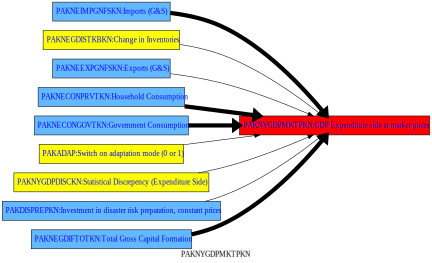

In [5]:
latex=0
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

:::{note}
**png=latex** 

The default behavior when displaying graphs in a *jupyter notebook* is to produce images in .svg format.
These images scale well and the mouseover
feature can be used. That is: On mouseover of a node, the variable and the equation are displayed. 
On mouseover on an edge the percent attribution for this variable is displayed

Unfortunately this *jupyter book* (that is not a notebook) can not be build into a latex and PDF  form using images in svg format.

When a  pdf file is created, the latex variable has to be set to True. If this notebook is used as a notebook set latex=0 and use the mouseover feature.
:::

### .tracepre(,,,filter=\<minimal impact>) Pruning the tree
Not all preceding variables have impact. By using filter=\<minimal impact> only  links where the minimal impact is more than \<minimal impact> are show. 

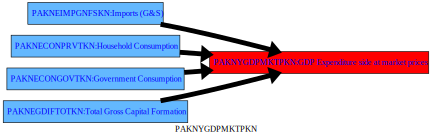

In [6]:
mpak.PAKNYGDPMKTPKN.tracepre(filter=20,png=latex)

### .tracepre(,,,up=\<upstream levels>) 
Combined with filter we can look behind the dependencies 

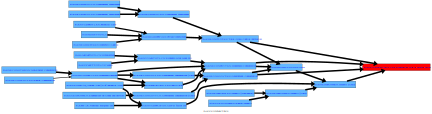

In [7]:
mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,up=3,png=latex)

### tracepre(,fokus2=\<variable pattern>,growthshow=True) Additional information regarding selected variables
The data for selected nodes can be displayed by mentioning the variable in fokus2=\<variable pattern>.<br>
To also show growth rates, growthshow=True can be specified. 

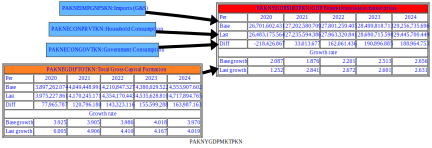

In [8]:
with mpak.set_smpl(2020,2024):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,fokus2='PAKNEGDIFTOTKN PAKNYGDPMKTPKN',growthshow=True)

## .tracedep match .tracepre for downstream (dependent variables) 

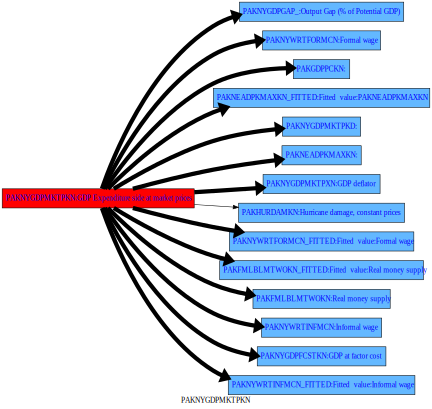

In [9]:
mpak.PAKNYGDPMKTPKN.tracedep()

## .modeldash() The really convenient  way to navigate the dependency graph
This is the way to navigate the dependency graph. You can point and click and much more.

Unfortunately you can not run this facility from this manual. It only works in a live notebook on your local computer. 

In [10]:
try:
    with mpak.set_smpl(2022,2026):
        mpak.modeldash('PAKNYGDPMKTPKN',jupyter=True,inline=False)  # delete # if running a live notebook 
except Exception as e:
    print(f"Can't show modeldash \n{e}")

apprun
Dash app running on http://127.0.0.1:5001/


And it will look like this 

![dash.png](dash.png)

## Plot the adjacency matrix for current periode
Another way to display the logical graph is as an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). 

This is the structure of the graph of  endogenous variables.

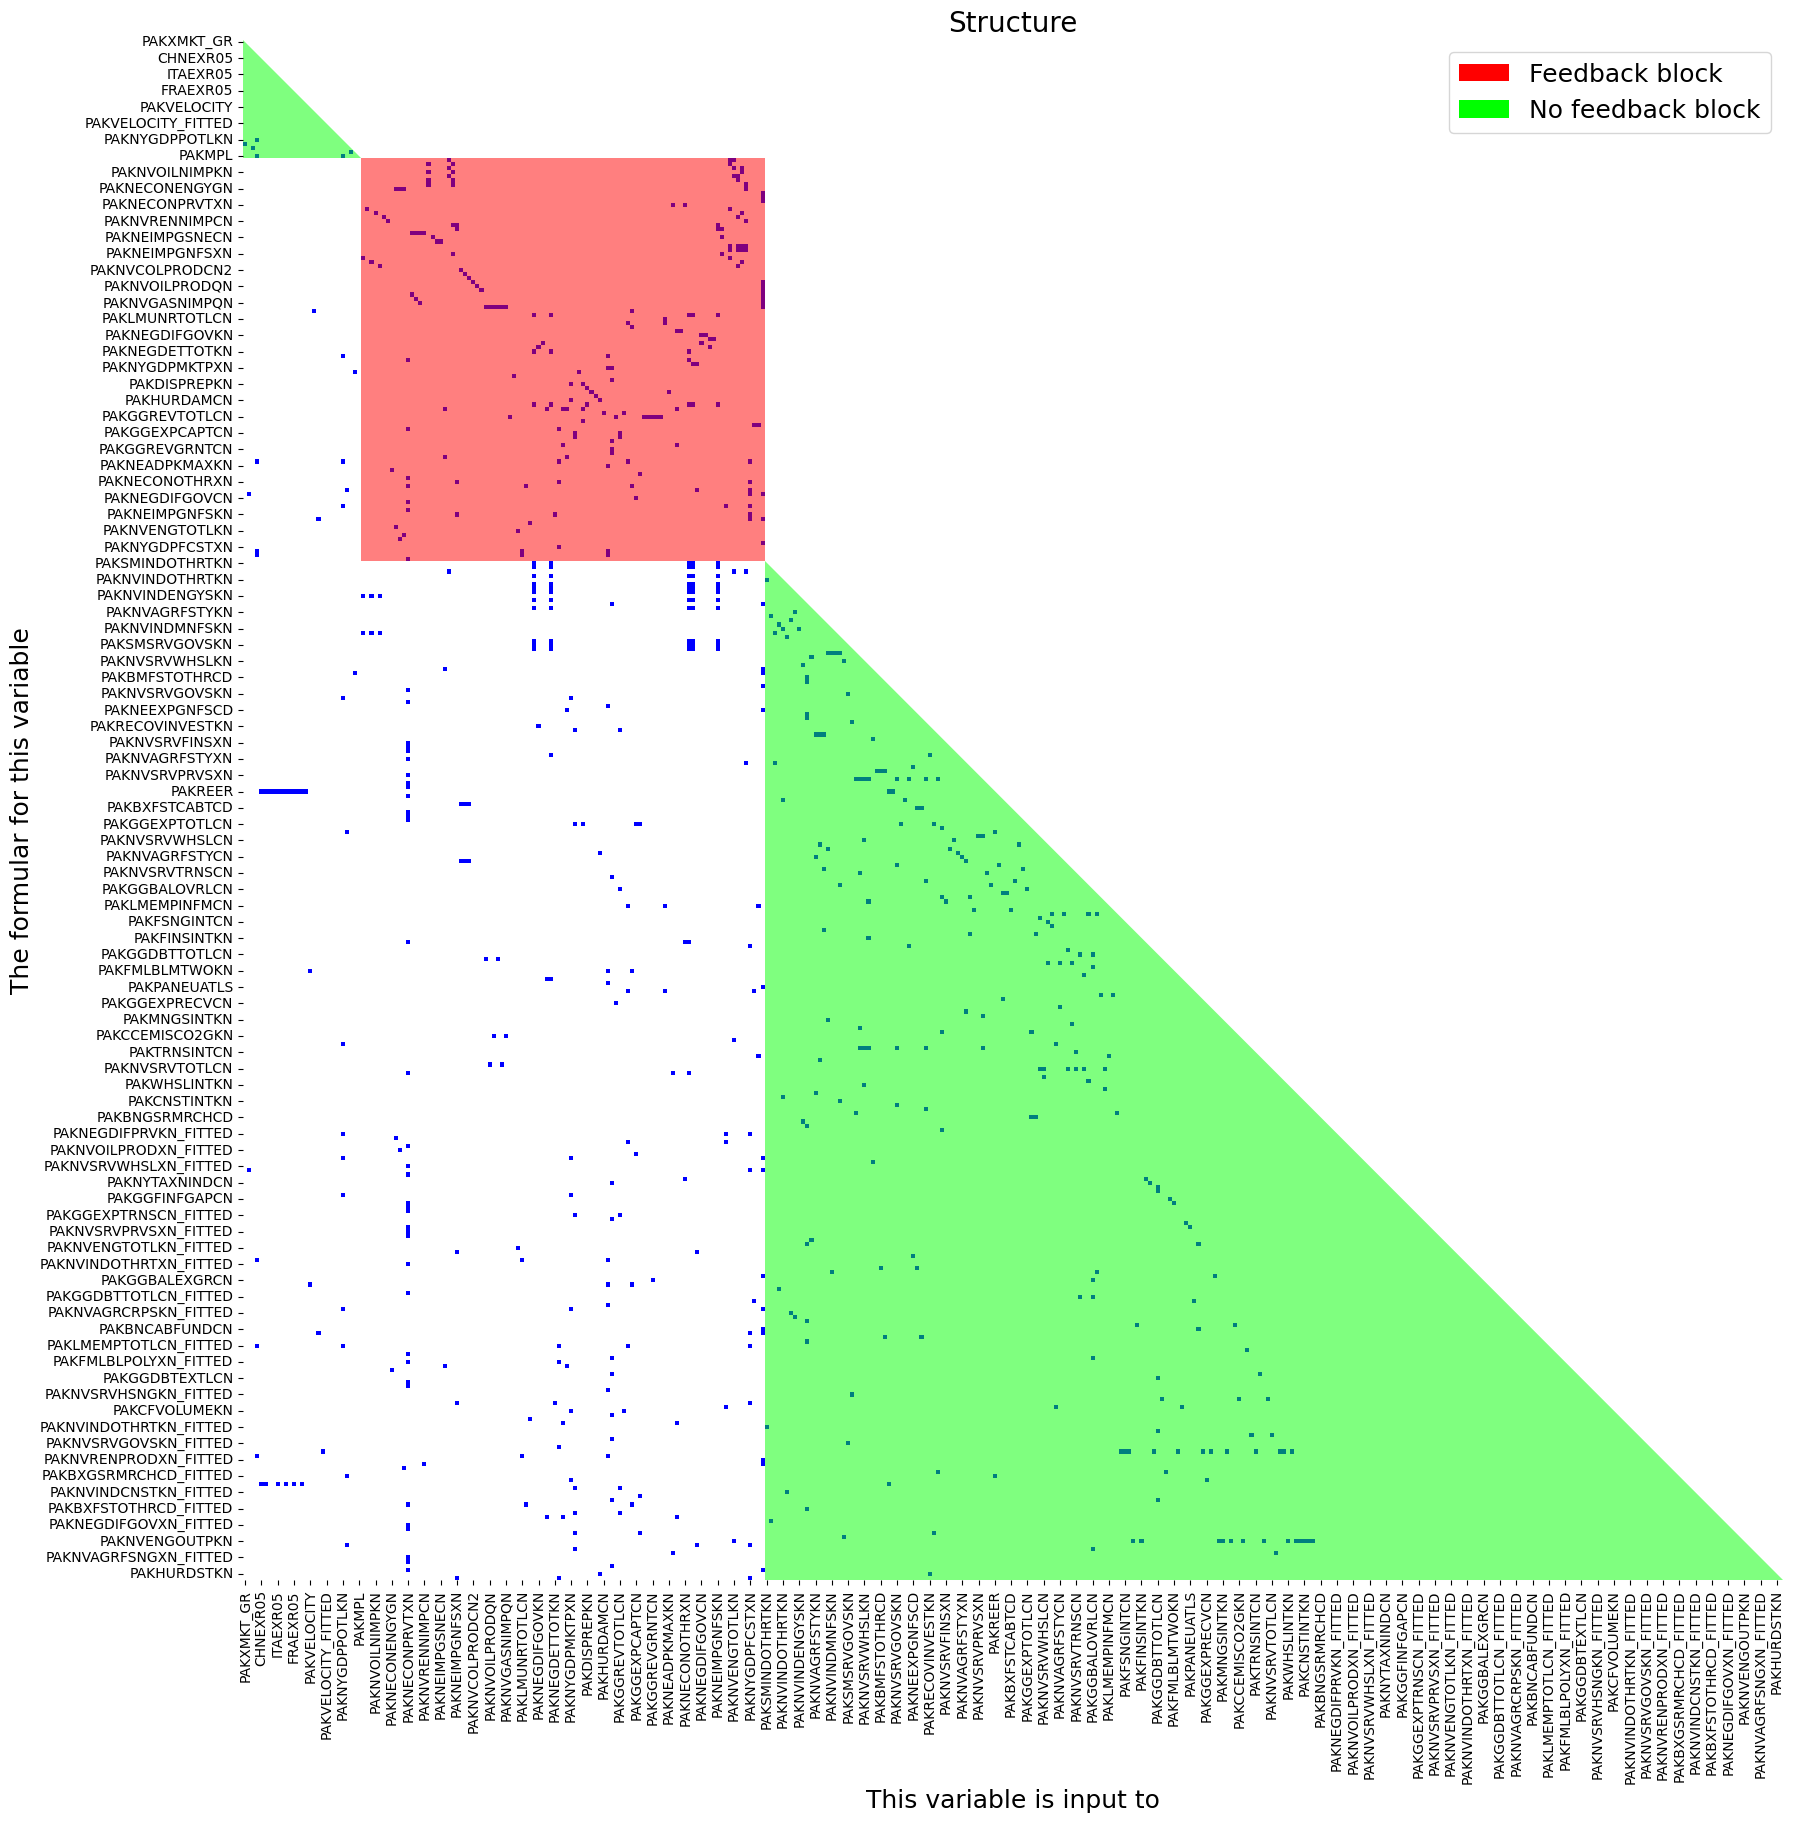

In [11]:
mpak.plotadjacency(size=(20,20),nolag=0);

## Plot the adjacency matrix including lagged effects


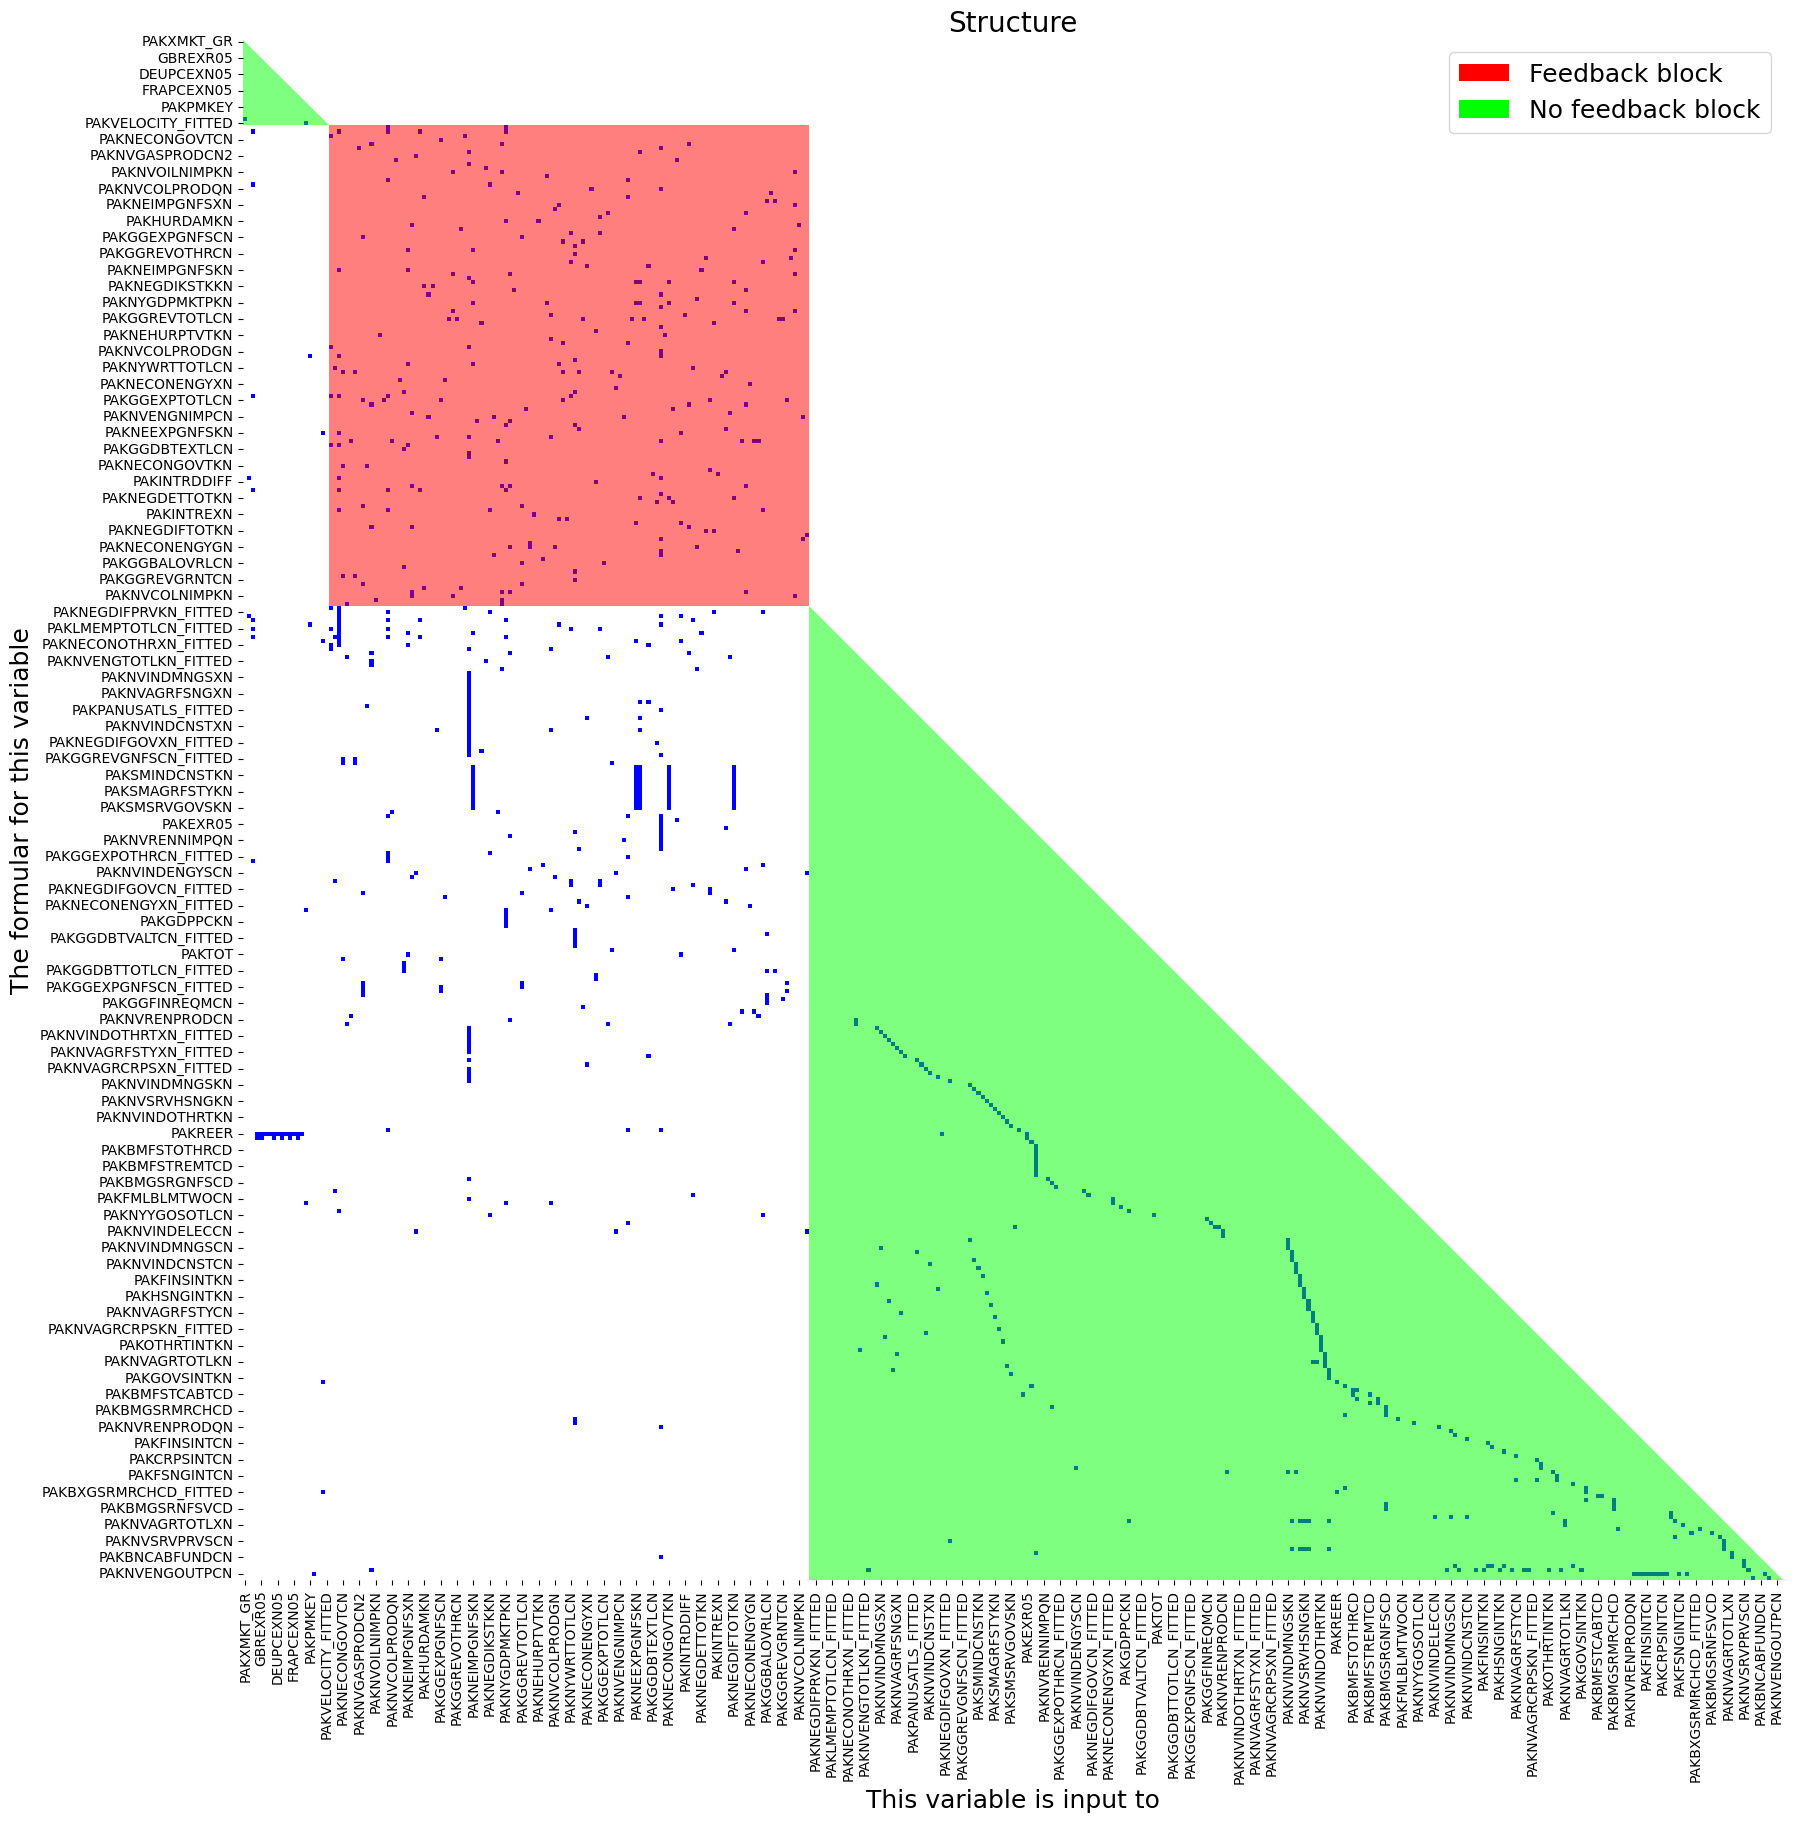

In [12]:
mpak.plotadjacency(size=(20,20),nolag=1);